# Table of Contents
 <p><div class="lev1"><a href="#start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>start</a></div><div class="lev1"><a href="#dev-my-ifft-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>dev my ifft</a></div><div class="lev2"><a href="#example-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>example 1</a></div><div class="lev2"><a href="#test-on-a-waveform-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>test on a waveform</a></div><div class="lev3"><a href="#helper-function-to-call-lal-waveforms-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>helper function to call lal waveforms</a></div><div class="lev3"><a href="#example-call-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>example call</a></div><div class="lev2"><a href="#LAL-ifft-of-IMRPhenomD-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LAL ifft of IMRPhenomD</a></div><div class="lev2"><a href="#my-ifft-to-compare-with-LAL-Time-domain-IMRPhenomD-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>my ifft to compare with LAL Time domain IMRPhenomD</a></div><div class="lev2"><a href="#try-phenompv3-example-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>try phenompv3 example</a></div><div class="lev2"><a href="#another-attempt-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>another attempt</a></div><div class="lev2"><a href="#start-again-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>start again</a></div><div class="lev3"><a href="#invfft2-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>invfft2</a></div><div class="lev3"><a href="#tests-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>tests</a></div>

# start 

In [ ]:
#todo - 
# get the time domain plots ready to compare to Ian's parameters.
# also get carl's parameters to compare to
# also get SEOBNRv3 - time and frequency domain to compare too.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import phenom
import numpy as np

import lal
import lalsimulation as lalsim

In [2]:
import v3utils

It's a new dawn


In [3]:
import scipy

In [4]:
from scipy.fftpack import fft, fftfreq, fftshift, ifft

In [5]:
m1=150.
m2=20.
chi1x=0.9
chi1y=0.
chi1z=0.3
chi2x=0.5
chi2y=0.
chi2z=0.5
delta_f=1/8.
f_min=10.

In [6]:
phenompv3 = phenom.Waveform(approximant="IMRPhenomPv3")
from copy import copy
phenpv3_1 = copy(phenompv3)

In [7]:
phenpv3_1.input_params['m1']=m1
phenpv3_1.input_params['m2']=m2
phenpv3_1.input_params['chi1x']=chi1x
phenpv3_1.input_params['chi1y']=chi1y
phenpv3_1.input_params['chi1z']=chi1z
phenpv3_1.input_params['chi2x']=chi2x
phenpv3_1.input_params['chi2y']=chi2y
phenpv3_1.input_params['chi2z']=chi2z
phenpv3_1.input_params['inclination']=0.
phenpv3_1.input_params['f_min']=f_min
phenpv3_1.input_params['delta_f']=delta_f

In [8]:
#phenomp_v3 waveform generator
phenpv3_1.phenompv3(phenpv3_1.input_params)

In [9]:
ph_phpLAL = phenom.Waveform(approximant='IMRPhenomPv2_LAL',m1=m1, m2=m2,
                            chi1x=chi1x, chi1y=chi1y, chi1z=chi1z,
                            chi2x=chi2x, chi2y=chi2y, chi2z=chi2z,
                            delta_f=delta_f, f_min=f_min)

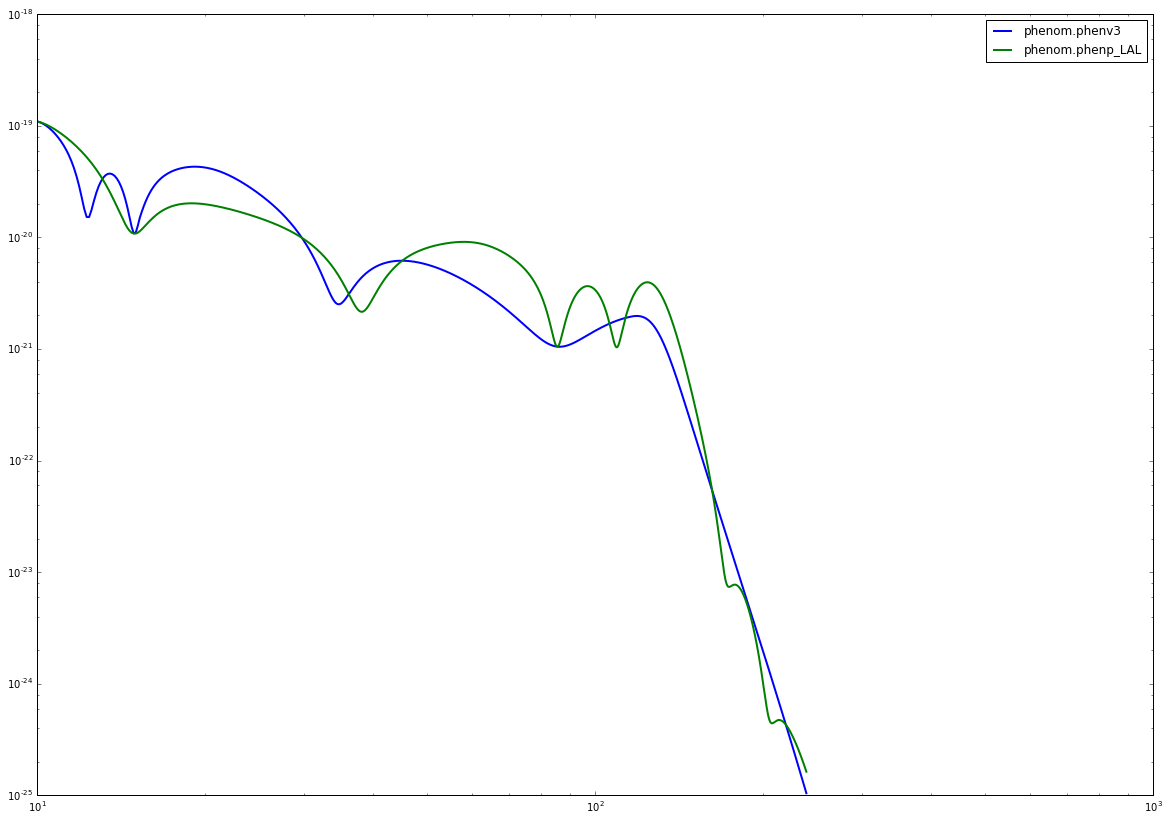

In [10]:
plt.figure( figsize=(20,14) )
plt.plot(phenpv3_1.flist_Hz, np.absolute(phenpv3_1.hptilde), label='phenom.phenv3', lw=2)
plt.plot(ph_phpLAL.flist_Hz, np.absolute(ph_phpLAL.hptilde), label='phenom.phenp_LAL', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim(0,10)

# dev my ifft

## example 1

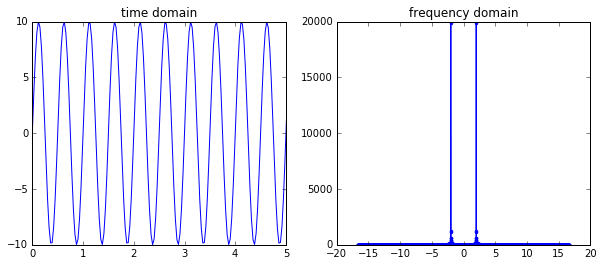

In [37]:
t = scipy.linspace(0,120,4000)
dt = (t[1]-t[0])
# acc = lambda t: 10*scipy.sin(2*np.pi*2.0*t) + 5*scipy.sin(2*np.pi*8.0*t)
acc = lambda t: 10*scipy.sin(2*np.pi*2.0*t)

signal = acc(t)


FFTfull = scipy.fft(signal)
FFT = abs(FFTfull)
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])


fig = plt.figure(figsize=(10,4))

fig.add_subplot(121)
ax1 = fig.gca()
ax1.plot(t, signal)
ax1.set_xlim(0,5)
ax1.set_title('time domain')

fig.add_subplot(122)
ax2 = fig.gca()
ax2.plot(freqs,FFT,'.-')
ax2.set_title('frequency domain')




In [ ]:
#now perform the ifft

In [106]:
df = freqs[1] - freqs[0]
print("frequency spacing = {0}".format(df))

frequency spacing = 0.00833125


In [107]:
# tlen = 1. / delta_t_desired / 1./df
tlen = 1. / dt / 1./df

In [108]:
tlen

4000.0000000000005

In [11]:
def get_times(dt, df):
    """
    dt is the desired time sampling
    df is the frequency spacing in the frequency domain data
    """
    tlen = 1./dt / df
    tmax = tlen * dt
    return np.linspace(0., tmax, tlen)

In [110]:
get_times(dt, df)[1]

0.030015005626875587

In [111]:
times_new = get_times(dt, df)

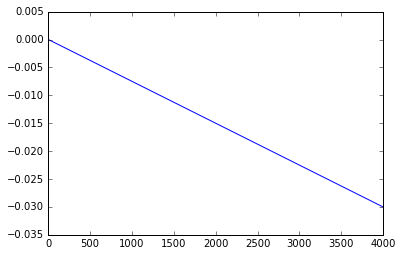

In [114]:
plt.plot(t -  times_new)

(0, 10)

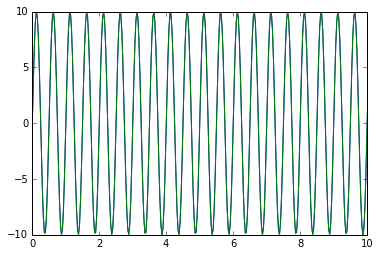

In [112]:
plt.plot(times_new, np.real(ifft(FFTfull)))
plt.plot(t, signal)
plt.xlim(0,10)

(0, 10)

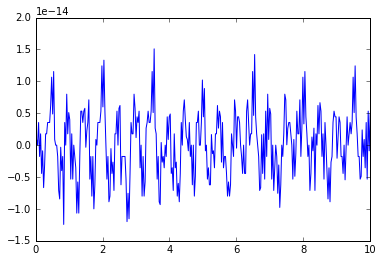

In [105]:
plt.plot(times_new, np.real(ifft(FFTfull)) - signal)
plt.xlim(0,10)

## test on a waveform

In [115]:
#get lal waveform

### helper function to call lal waveforms

In [6]:
import lal
import lalsimulation as LS
import numpy as np

def q_from_eta(eta):
    """
    Assumes m1 >= m2
    converts symmetric-mass-ratio to mass-ratio
    input: eta
    output: q
    """
    Seta = np.sqrt(1. - 4. * eta)
    return (1. + Seta - 2. * eta)/(2. * eta)

def m1_m2_M_eta(M, eta):
    """
    Assumes m1 >= m2
    Computes the component masses m1 and m2
    from the total mass and symmetric mass-ratio.
    input: M, eta
    output: m1, m2
    """
    Seta = np.sqrt(1. - 4. * eta)
    m1 = 1./2. * (M + Seta * M)
    m2 = 1./2. * (M - Seta * M)
    return m1, m2

def CallTDWaveform(approx, M, eta, chi1z, chi2z, chi1x, f_min=10, srate=2**14, f_ref=0.0, iota=0):
    """assuming m1>=m2"""
    deltaT=1./srate
    q = q_from_eta(eta)
    m1, m2 = m1_m2_M_eta(M, eta)
    m1_SI = m1 * lal.MSUN_SI
    m2_SI = m2 * lal.MSUN_SI
    # print 'chi_eff = ', (m1*chi1 + m2*chi2)/M
    # f_max_Hz = f_max / (M * lal.MTSUN_SI)
    phiRef = 0.0
    S1x = chi1x
    S1y = 0.0
    S1z = chi1z
    S2x = 0.0
    S2y = 0.0
    S2z = chi2z
    r = 1e6 * lal.PC_SI
    z = 0.0
    i = iota
    lambda1 = 0.0
    lambda2 = 0.0
    waveFlags = None
    nonGRparams = None
    amplitudeO = -1
    phaseO = -1
    # approximant = LS.GetApproximantFromString("IMRPhenomPv2")
    approximant = LS.GetApproximantFromString(approx)
    # print approximant
    hp, hc = LS.SimInspiralChooseTDWaveform(phiRef,
                                            deltaT,
                                            m1_SI, m2_SI,
                                            S1x, S1y, S1z, S2x, S2y, S2z,
                                            f_min, f_ref,
                                            r,
                                            i,
                                            lambda1, lambda2, waveFlags, nonGRparams,
                                            amplitudeO, phaseO,
                                            approximant)
    t = np.arange(hp.data.length) * hp.deltaT

    #convert to units of total mass (dimensionless)
    t = phenom.StoM(t, m1 + m2)
    
    return t, hp.data.data, hc.data.data

def CallFDWaveform(approx, M, eta, chi1z, chi2z, chi1x, f_min=10, f_max=0, srate=2**14, f_ref=0.0, iota=0):
    """assuming m1>=m2"""
    deltaF=1./srate
    q = q_from_eta(eta)
    m1, m2 = m1_m2_M_eta(M, eta)
    m1_SI = m1 * lal.MSUN_SI
    m2_SI = m2 * lal.MSUN_SI
    # print 'chi_eff = ', (m1*chi1 + m2*chi2)/M
    # f_max_Hz = f_max / (M * lal.MTSUN_SI)
    phiRef = 0.0
    S1x = chi1x
    S1y = 0.0
    S1z = chi1z
    S2x = 0.0
    S2y = 0.0
    S2z = chi2z
    r = 1e6 * lal.PC_SI
    z = 0.0
    i = iota
    lambda1 = 0.0
    lambda2 = 0.0
    waveFlags = None
    nonGRparams = None
    amplitudeO = -1
    phaseO = -1
    # approximant = LS.GetApproximantFromString("IMRPhenomPv2")
    approximant = LS.GetApproximantFromString(approx)
    hp, hc = LS.SimInspiralChooseFDWaveform(phiRef,
                                            deltaF,
                                            m1_SI, m2_SI,
                                            S1x, S1y, S1z, S2x, S2y, S2z,
                                            f_min, f_max, f_ref,
                                            r,
                                            i,
                                            lambda1, lambda2, waveFlags, nonGRparams,
                                            amplitudeO, phaseO,
                                            approximant)
    f = np.arange(hp.data.length) * hp.deltaF
    
    #convert to units of total mass (dimensionless)
    f = phenom.HztoMf(f, m1 + m2)
    
    return f, hp.data.data, hc.data.data

In [7]:
from phenom.utils.utils import pad_to_pow_2

class WaveformTD(object):
    def __init__(self, t, hp, hc):
        
        self.t = t
        self.hp = hp
        self.hc = hc
        
        self.dt = self.t[1] - self.t[0]
        
        self.amp = self.get_amp(self.hp, self.hc)
        self.peak_index = self.get_peak_index(self.hp, self.hc)
        self.tshifted = self.shift_times(self.t, self.hp, self.hc)
        self.phase = self.get_phase(self.hp, self.hc)
        
#         self.f, self.hptilde, self.hctilde = self.compute_fft(self.t, self.hp, self.hc, self.dt)
        self.f, self.hptilde, self.hctilde = self.compute_fft(self.tshifted, self.hp, self.hc, self.dt)
        
    def get_amp(self, hp, hc):
        return np.sqrt(hp**2. + hc**2.)
    
    def get_peak_index(self, hp, hc):
        amp = self.get_amp(hp, hc)
        max_amp_index = list(amp).index(max(amp))
        return max_amp_index
    
    def shift_times(self, t, hp, hc):
        max_amp_index = self.get_peak_index(hp, hc)
        return t - t[max_amp_index]
    
    def get_phase(self, hp, hc):
        return np.unwrap(np.angle(hp + 1.j * hc))
    
    def compute_fft(self, t, hp, hc, dt):
        
        ptaper_lower = phenom.planck_taper(t, t[0], t[0] + 1000.)
#         ptaper_lower = phenom.planck_taper(t, t[0], t[0] + 2.)
        hp = ptaper_lower * hp
        hc = ptaper_lower * hc
        plt.plot(t, hp)
#         print("dt = {0}".format(dt))
        
#         t = pad_to_pow_2(t, 1)        
#         hp = pad_to_pow_2(hp, 1)
#         hc = pad_to_pow_2(hc, 1)
        
        
        N = len(t)
        hptilde = scipy.fftpack.fft(hp) * dt / phenom.StoM(1., 100.)
        hctilde = scipy.fftpack.fft(hc) * dt / phenom.StoM(1., 100.)
        f = scipy.fftpack.fftfreq(N, dt)
        
        mask = ( f > 0 )
        #return only positive frequencies
#         return f[0:N/2], hptilde[0:N/2], hctilde[0:N/2]

        #note that if the time domain waveform is in units of the total mass (M) then
        #we have to divide by the total mass in M

        return f[mask], hptilde[mask], hctilde[mask]


### example call

In [117]:
t={}
hp={}
hc={}

In [118]:
f={}
hptilde={}
hctilde={}
f['phd'], hptilde['phd'], hctilde['phd'] = CallFDWaveform("IMRPhenomD", 100., 0.2222, 0., 0., 0., f_min=5., srate=10)

In [119]:
t['phd'], hp['phd'], hc['phd'] = CallTDWaveform("IMRPhenomD", 100., 0.2222, 0., 0., 0., f_min=5.)
t['v2'], hp['v2'], hc['v2'] = CallTDWaveform("SEOBNRv2", 100., 0.2222, 0., 0., 0., f_min=5.)

In [120]:
t['phpv2'], hp['phpv2'], hc['phpv2'] = CallTDWaveform("IMRPhenomPv2", 100., 0.2222, 0., 0., 0.8, f_min=5.)
t['v3'], hp['v3'], hc['v3'] = CallTDWaveform("SEOBNRv3", 100., 0.2222, 0., 0., 0.8, f_min=5., srate=2**13)

/Users/sebastian/git/phenom/phenom/utils/utils.py:384: RuntimeWarning: overflow encountered in exp
  tout.append(1./(exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


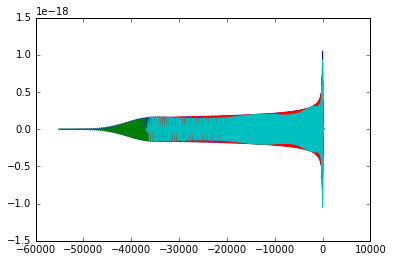

In [122]:
phend = WaveformTD(t['phd'], hp['phd'], hc['phd'])
phpv2 = WaveformTD(t['phpv2'], hp['phpv2'], hc['phpv2'])

v2 = WaveformTD(t['v2'], hp['v2'], hc['v2'])
v3 = WaveformTD(t['v3'], hp['v3'], hc['v3'])

(-10000, 50)

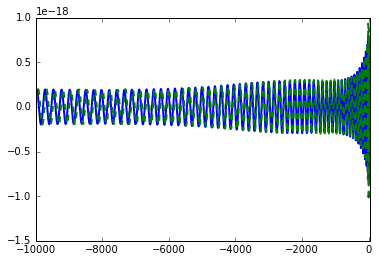

In [123]:
# plt.plot(StoM(phend.t, 100), phend.hp)
# plt.plot(MtoS(StoM(phend.t, 100), 100), phend.hp)
# plt.plot(phend.tshifted, phend.hp)

plt.plot(phpv2.tshifted, phpv2.hp, lw=2)
plt.plot(v3.tshifted, v3.hp, ls='--', lw=2)
plt.xlim(-10000,50)

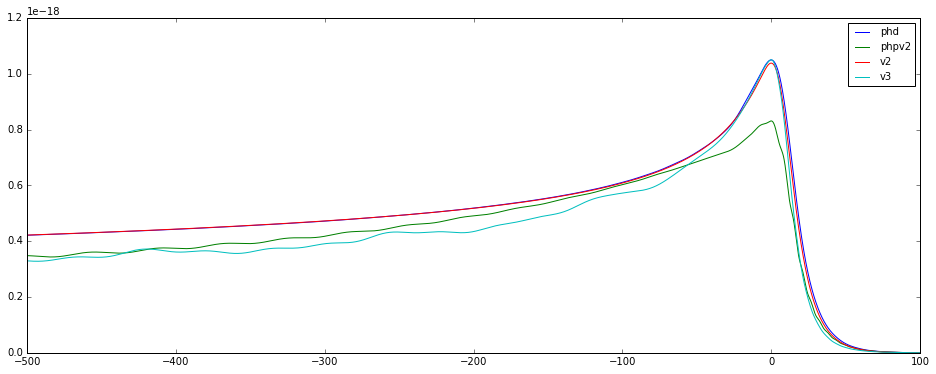

In [124]:
plt.figure(figsize=(16, 6))
plt.plot(phend.tshifted, phend.amp, label='phd', lw=1)
plt.plot(phpv2.tshifted, phpv2.amp, label='phpv2', lw=1)
plt.plot(v2.tshifted, v2.amp, label='v2', lw=1)
plt.plot(v3.tshifted, v3.amp, label='v3', lw=1)
plt.xlim(-500,100)
plt.legend(loc='best', fontsize=10)

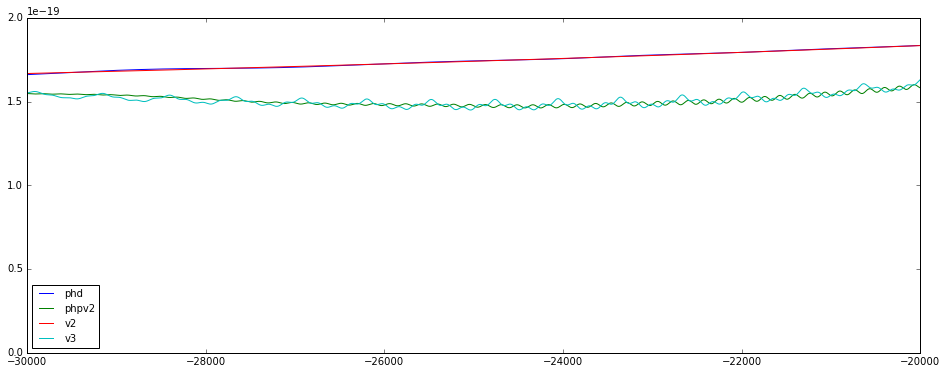

In [137]:
plt.figure(figsize=(16, 6))
plt.plot(phend.tshifted, phend.amp, label='phd', lw=1)
plt.plot(phpv2.tshifted, phpv2.amp, label='phpv2', lw=1)
plt.plot(v2.tshifted, v2.amp, label='v2', lw=1)
plt.plot(v3.tshifted, v3.amp, label='v3', lw=1)
plt.xlim(-30000,-20000)
plt.ylim(0.,0.2 * 1e-18)
plt.legend(loc='best', fontsize=10)

## LAL ifft of IMRPhenomD

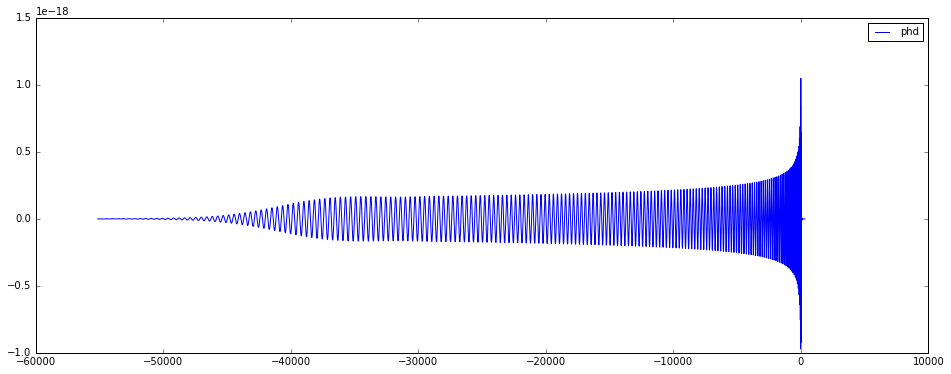

In [141]:
plt.figure(figsize=(16, 6))
plt.plot(phend.tshifted, phend.hp, label='phd', lw=1)
plt.legend(loc='best', fontsize=10)

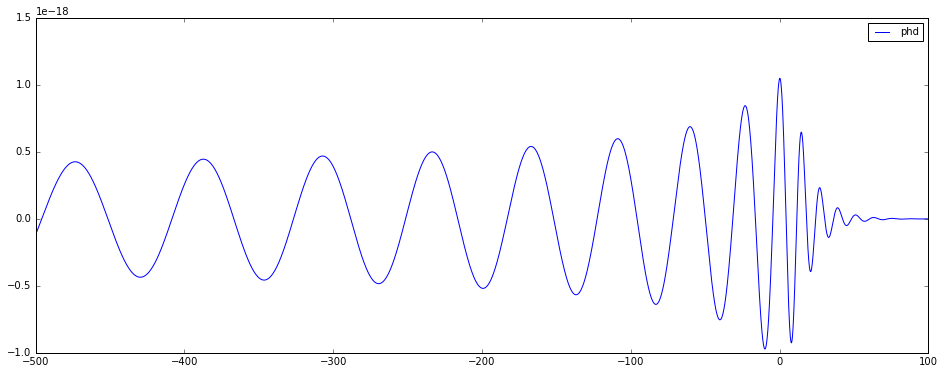

In [139]:
plt.figure(figsize=(16, 6))
plt.plot(phend.tshifted, phend.hp, label='phd', lw=1)
plt.xlim(-500,100)
plt.legend(loc='best', fontsize=10)

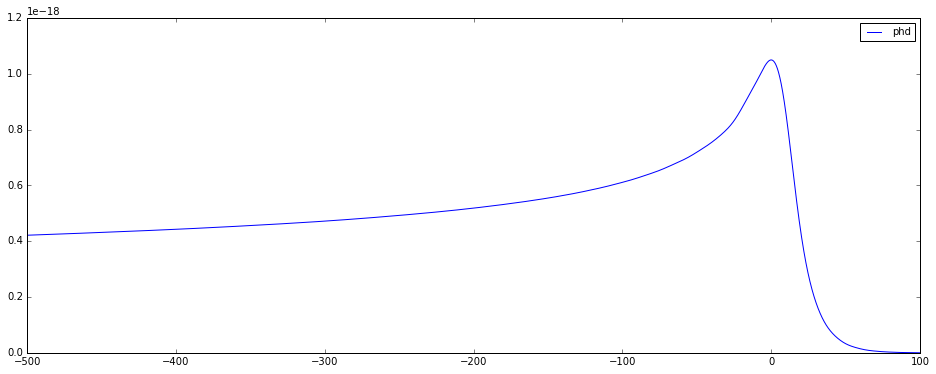

In [138]:
plt.figure(figsize=(16, 6))
plt.plot(phend.tshifted, phend.amp, label='phd', lw=1)
plt.xlim(-500,100)
plt.legend(loc='best', fontsize=10)

## my ifft to compare with LAL Time domain IMRPhenomD

In [142]:
phend.f

array([  1.80365349e-05,   3.60730699e-05,   5.41096048e-05, ...,
         4.03491716e+00,   4.03493519e+00,   4.03495323e+00])

In [153]:
phend_htilde = phend.hptilde + 1.j * phend.hctilde

In [154]:
phend_my_TD_strain = ifft(phend_htilde)

In [158]:
phend_htilde.shape

(223710,)

In [159]:
phend_my_TD_strain.shape

(223710,)

In [160]:
dt = phend.t[1] - phend.t[0]
print dt

0.123916896678


In [161]:
df = phend.f[1] - phend.f[0]
print df

1.8036534933e-05


In [183]:
# phend_my_times = get_times( dt, df )
phend_my_times = get_times( 2.*dt, df )

In [184]:
phend_my_times.shape

(223710,)

(50000, 60000)

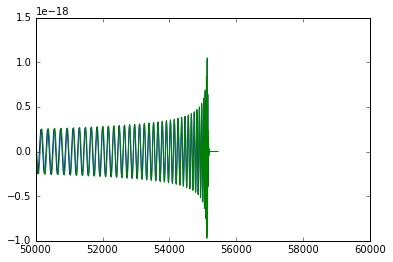

In [215]:
# plt.plot(phend_my_times, np.real(phend_my_TD_strain) * ( 10000 ) )
plt.plot(phend_my_times, np.real(phend_my_TD_strain) * ( 8000 ) )
plt.plot(phend.t, phend.hp)
plt.xlim(50000, 60000)

In [226]:
print (1/dt)
print phenom.StoM(1., 100.)*4

8.06992449624
8121.01774069


In [ ]:
# there is a strange scalling of about 8000 that I have to apply to my ifft to
# get it to agree with the LAL time domain waveform. Not sure exactl where this
# comes from. Mass scaling possibly.

## try phenompv3 example

In [399]:
# m1=120.
# m2=40.
# chi1x=0.9
# chi1y=0.
# chi1z=0.2
# chi2x=0.
# chi2y=0.
# chi2z=0.5
# delta_f=1/256.
# f_min=5.

m1=80.4782639
m2=16.384655
chi1x=0.062809065
chi1y=0.528722703
chi1z=-0.77006942
chi2x=-0.102698207
chi2y=-0.0977499112
chi2z=-0.0815029368
delta_f=1.0/256
f_min=30.
inc=2.85646439

In [400]:
t={}
hp={}
hc={}

In [401]:
t['phpv2'], hp['phpv2'], hc['phpv2'] = CallTDWaveform("IMRPhenomPv2", m1+m2, phenom.eta_from_q(m1/m2), chi1z, chi2z, chi1x, f_min=f_min, iota=inc)

In [402]:
print t['phpv2'][0]
print t['phpv2'][1]
print t['phpv2'][-1]
print t['phpv2'][-1] - t['phpv2'][0]
print t['phpv2'][1] - t['phpv2'][0]

0.0
0.127930169858
3587.41782315
3587.41782315
0.127930169858


In [403]:
phenpv3_1.input_params['m1']=m1
phenpv3_1.input_params['m2']=m2
phenpv3_1.input_params['chi1x']=chi1x
phenpv3_1.input_params['chi1y']=chi1y
phenpv3_1.input_params['chi1z']=chi1z
phenpv3_1.input_params['chi2x']=chi2x
phenpv3_1.input_params['chi2y']=chi2y
phenpv3_1.input_params['chi2z']=chi2z
phenpv3_1.input_params['inclination']=inc
phenpv3_1.input_params['f_min']=f_min
phenpv3_1.input_params['delta_f']=delta_f

In [404]:
#phenomp_v3 waveform generator
phenpv3_1.phenompv3(phenpv3_1.input_params)

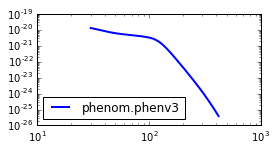

In [405]:
plt.figure( figsize=(4,2) )
plt.plot(phenpv3_1.flist_Hz, np.absolute(phenpv3_1.hptilde), label='phenom.phenv3', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim(0,10)

In [212]:
#get time domain waveform
times_phpv3 = get_times(8./len(phenpv3_1.flist_Hz), phenpv3_1.flist_Hz[1]-phenpv3_1.flist_Hz[0])
print times_phpv3.shape

(1951,)


In [213]:
times_phpv3[-1]

8.0

In [214]:
# td_strain_phpv3 = ifft( (phenpv3_1.hptilde + 1.j * phenpv3_1.hctilde) * np.exp(-1.j*2.*np.pi*phenpv3_1.flist_Hz) )
td_strain_phpv3 = ifft( (phenpv3_1.hptilde + 1.j * phenpv3_1.hctilde) * np.exp(-1.j*2.*np.pi*phenpv3_1.flist_Hz*20) )
print td_strain_phpv3.shape

(1951,)


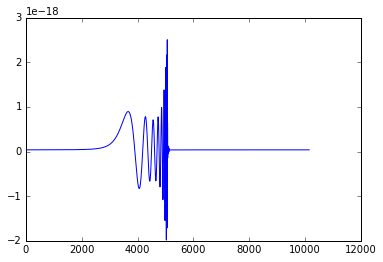

In [215]:
plt.plot(phenom.StoM(times_phpv3, m1+m2), np.real(td_strain_phpv3)*1000/2)

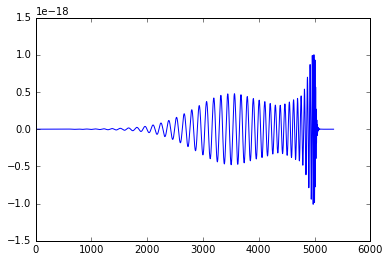

In [216]:
plt.plot( t['phpv2'], hp['phpv2'] )

## another attempt

In [234]:
np.ceil(1.24)

2.0

In [407]:
def invfft(f, htilde, flow, dt):
    phase = np.unwrap(np.angle(htilde))
    phase_shift = (phase[0] - phase[-1])/2.

    dfMax=np.pi / (phase[0] - phase_shift )
    
    df=np.abs(dfMax / 2.)

    
    htilde = htilde * np.exp( -1.j * phase_shift * f)
    
    
    nPts = np.ceil(1. / (df * dt))
    
    
    totT=nPts * dt
    df=1./totT
    fmax = 1./(2. *  dt)
    

#     ptaper_lower = phenom.planck_taper(f, f[0], f[0] + 1.)
    ptaper_lower = phenom.planck_taper(f, f[0], f[0] + 5.)
    htilde_taper = ptaper_lower * htilde

    plt.figure()
    plt.plot(f, np.abs(htilde))
    plt.plot(f, np.abs(htilde_taper))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-27, 1e-17)
    
    td = ifft(htilde_taper) / df
#     td = ifft(htilde) * df
    
    plt.figure()
    plt.plot(np.real(td))
    
    times = np.arange( 0., totT, dt )
    
    return times, td

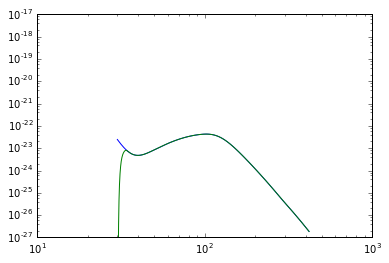

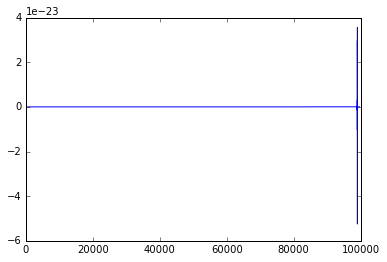

In [420]:
times, td = invfft(phenpv3_1.flist_Hz, phenpv3_1.hptilde + 1.j * phenpv3_1.hctilde, 0, 0.1)

In [421]:
td

array([ -2.33752744e-30 +5.45789415e-30j,
        -1.69760779e-30 +5.64994416e-30j,
        -8.59282770e-31 +5.74947205e-30j, ...,
        -2.76908109e-30 +5.69551591e-30j,
        -2.61652580e-30 +6.20262200e-30j,  -2.35192855e-30 +5.88100896e-30j])

In [422]:
times.shape

(81,)

In [423]:
times

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ])

In [424]:
maxindex = list(np.abs(td)).index(np.max(np.abs(td)))

In [425]:
td.shape

(99636,)

In [426]:
x=np.linspace(0, len(td), len(td));

(-3000, 100)

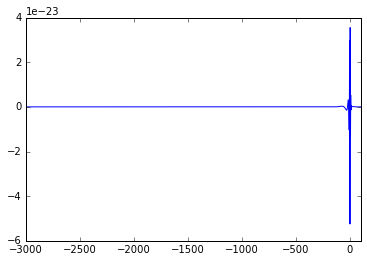

In [427]:
plt.plot(x - maxindex, np.real(td))
plt.xlim(-3000,100)

(-50, 50)

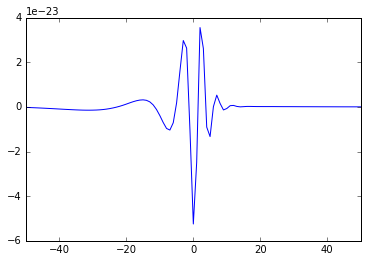

In [428]:
plt.plot(x - maxindex, np.real(td))
plt.xlim(-50,50)

(-6000, 900)

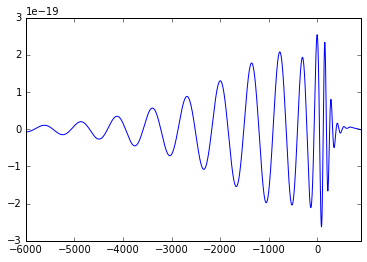

In [429]:
maxindex_y = list(hp['phpv2']).index(np.max(hp['phpv2']))
y=np.linspace(0, len(hp['phpv2']), len(hp['phpv2']));
plt.plot(y - maxindex_y, hp['phpv2'])
plt.xlim(-6000,900)

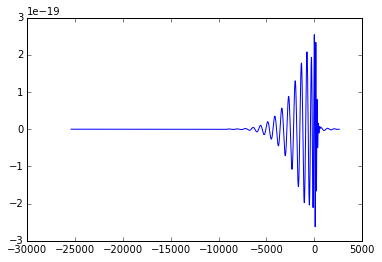

In [430]:
maxindex_y = list(hp['phpv2']).index(np.max(hp['phpv2']))
y=np.linspace(0, len(hp['phpv2']), len(hp['phpv2']));
plt.plot(y - maxindex_y, hp['phpv2'])
# plt.xlim(-20000,900)

## start again

In [7]:
# m1=150.
# m2=20.
# chi1x=0.9
# chi1y=0.
# chi1z=0.3
# chi2x=0.5
# chi2y=0.
# chi2z=0.5
# delta_f=1/256.
# f_min=1.

In [167]:
2**9

512

In [179]:
m1=10.
m2=10.
chi1x=0.9
chi1y=0.
chi1z=0.
chi2x=0.
chi2y=0.
chi2z=0.
delta_f=1./2.**9.
f_min=50.

In [180]:
ph_phpLAL = phenom.Waveform(approximant='IMRPhenomPv2_LAL',m1=m1, m2=m2,
                            chi1x=chi1x, chi1y=chi1y, chi1z=chi1z,
                            chi2x=chi2x, chi2y=chi2y, chi2z=chi2z,
                            delta_f=delta_f, f_min=f_min)

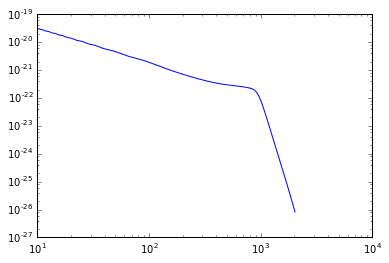

In [171]:
plt.plot(ph_phpLAL.flist_Hz, np.abs(ph_phpLAL.hptilde) )
plt.xscale('log')
plt.yscale('log')

In [ ]:
#get lal time domain

In [134]:
t={}
hp={}
hc={}

In [135]:
t['phpv2'], hp['phpv2'], hc['phpv2'] = CallTDWaveform("IMRPhenomPv2", m1+m2, m1*m2/(m1+m2)**2., chi1z, chi2z, chi1x, f_min=10.)

In [136]:
print t['phpv2'][1] - t['phpv2'][0]

0.61958448339


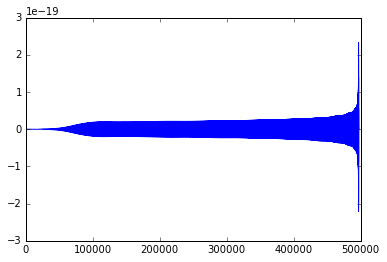

In [137]:
plt.plot( t['phpv2'], hp['phpv2'] )

### invfft2

In [80]:
def invfft2(f, htilde, flow, dt):
    phase = np.unwrap(np.angle(htilde))
    
    phase_shift = (phase[0] - phase[-1])/2.

    dfMax=np.pi / (phase[0] - phase_shift )
    
    df=np.abs(dfMax / 2.)

    
    htilde = htilde * np.exp( -1.j * phase_shift * f)
    
    
    nPts = np.ceil(1. / (df * dt))
    
    
    totT=nPts * dt
    df=1./totT
    fmax = 1./(2. *  dt)
    
#     ptaper_lower = phenom.planck_taper(f, f[0], f[0] + 1.)
    ptaper_lower = phenom.planck_taper(f, f[0], f[0] + 5.)
    htilde_taper = ptaper_lower * htilde

#     plt.figure()
#     plt.plot(f, np.abs(htilde))
#     plt.plot(f, np.abs(htilde_taper))
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.ylim(1e-27, 1e-17)
    
    td = ifft(htilde_taper) * df
    
#     plt.figure()
#     plt.plot(np.real(td))
    
    times = np.linspace( 0., totT, len(td) )
#     times = np.arange( 0., totT, 0.1239 )
    
    return times, td

### tests

In [ ]:
times, td = invfft2( ph_phpLAL.flist_Hz, ph_phpLAL.hptilde + 1.j * ph_phpLAL.hctilde, 0 , 0.1 )

In [ ]:
td[0]

In [ ]:
times.shape

In [ ]:
td.shape

(-0.01, 0.01)

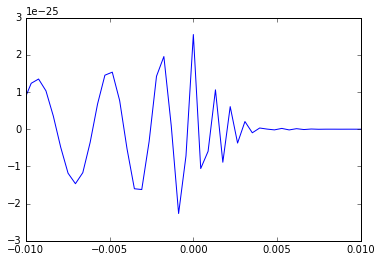

In [178]:
maxindex = list(np.abs(td)).index(np.max(np.abs(td)))
plt.plot(times - times[maxindex], np.real(td))
plt.xlim(-0.01,0.01)

(-100, 100)

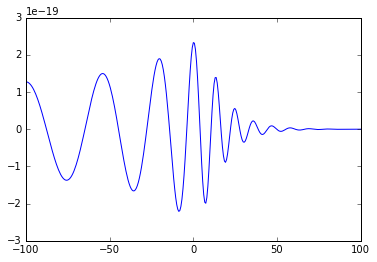

In [177]:
maxindex2 = list(np.abs(hp['phpv2'])).index(np.max(np.abs(hp['phpv2'])))
plt.plot( t['phpv2'] - t['phpv2'][maxindex2], hp['phpv2'] )
plt.xlim(-100,100)